In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
image = cv2.imread("/content/MRI-scan-data-top-view-from-2014-showing-the-large-astrocytoma-brain-tumor-white.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

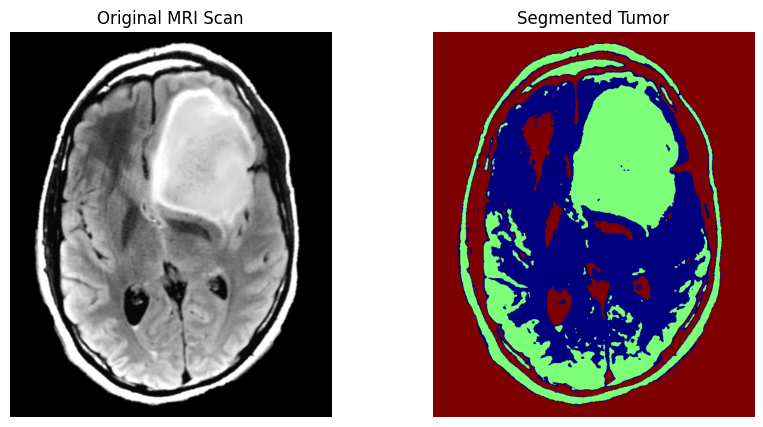

In [4]:
# Reshape the image into a 2D array of pixels
pixels = gray.reshape(-1, 1)

# Apply K-Means clustering
K = 3  # Number of clusters (Background, Normal, Tumor)
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixels)

# Replace pixel values with their cluster centers
segmented_img = kmeans.labels_.reshape(gray.shape)

# Display the original and segmented images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original MRI Scan")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_img, cmap='jet')  # Different colors for clusters
plt.title("Segmented Tumor")
plt.axis("off")

plt.show()